Kaiming Cheng (kc4jd)
Junyan Lin (jl5rj)

# Personal dota analyzer and win-rate predictor



## Abstract
    The purpose of our project is to learn about MOBA games mechanisms in hero selection, how to predict the winning probability of the team given the team composition, which is composed by five different heroes; we would also show how our analysis, based on player’s heroes pool, can help the players to understand their potential performance given the heroes that the players selected.
    As part of this project, we design and implement a predicting algorithm where the goal is to predict the adeptness (the KDA ratio) of a player given the selection of a hero, and therefore how the selection of hero can used to predict the winning probability. Later, we developed the prediction of winning chance based on the hero selection through the neural network. By choosing a moderate activation function we can select the one with the highest accuracy. 
    

## Term Explanation
### Primary Attribute: Heroes are divided into three kinds: Strength, Agility, Intelligence. 
	Strength: toughness and endurance. Determine max health, health regeneration, magic resistance.
	Agility: swiftness and dexterity. Determine armor, attack speed, movement speed.
	Intelligence: wit and wisdom. Determine max mana, mana regeneration, spell damage amplification.
    Attack Type: Heroes have two attack types, Melee and Ranged. Melee heroes attack hits instantly upon reaching their attack point; Ranged heroes fire a projectile when they attack.
    Roles:  There exist nine official roles that describe heroes’ usage as a combination of their attributes, abilities and items, and the ways that these factors shape the game.
	Carry: Will become more useful later in the game if they gain a significant gold advantage
	Support: Can focus less on amassing gold and items, and more on using their abilities to gain an advantage for the team
	Nuker: Can quickly kill enemy heroes using high damage spells with low cooldowns
	Disabler: Has a guaranteed disable for on or more of their spells
	Jungler: Can farm effectively from the neutral creeps inside the jungle early in the game
	Durable: Has the ability to last longer in team fights
	Escape: Has the ability to quickly avoid death
	Pusher: Can quickly siege and destroy towers and barracks at all points of the game
	Initiator: Good at starting a team fight
    KDA Ratio: (#Kill + #Assist) / #Death
    0.0~0.9 = Bad (Contributing to the opposing team more than your own)
    1.0~1.9 = Poor (Contributing to the opposing team more than your own)
    2.0~2.9 = Average (Contributing an equal amount to both sides)
    3.0~3.9 = Good (Contributing to your own team more than theirs)
    4.0 (& up) = Excellent (Contributing to your own team more than theirs)
    Turn Rate: The speed at which a unit can turn

## DataSet
    Firstly, we collect 38,357 public matches data using OpenDota Explorer
    Below is the query we used:
        select * 
        from public_matches 
        where avg_mmr > 5000 (top 10% skill level) and 
            lobby_type = 7 (index for COMPETITIVE_MATCH) and 
            game_mode = 22 (index for ALL-PICK MODE) and 
            start_time > 1535760000 and
            start_time < 1539280800
    Then, we save the result as public_matches.json by clicking the API
    
    Also, we collect 20,000 public matches based on users IDs. 
    Below is the query we used:
    select * 
    from public_matches 
    where avg_mmr > 5000 (top 10% skill level) and 
        lobby_type = 7 (index for COMPETITIVE_MATCH) and 
        game_mode = 22 (index for ALL-PICK MODE) and 
        account_id = random.randint(100_000_000,999_999_999)
    Then, we save the result and split them into training and testing files. 
    
    
## Introduction
    DotA 2, an online multi-player game created by Valve, has a user-base of over 8 million players and has competitions with prize pools of up to 30 million dollars. 
    A DotA 2 match consists of a fight between two teams, named Radiant and Dire, of five players at each side. The ultimate goals of both sides are to destroy one another's fortress. Each player controls a hero while each hero has a unique skillset. 
    Currently, there are over 116 different heroes to choose from. During the picking/banning process, once one hero is chosen, other players may not choose that same hero. The choice of heroes plays a large role in determining the match outcome. Since heroes are often designed with a variety of physical attributes and skills, which together add to a team’s overall power. Therefore, players need to draft heroes that can enhance the strengths and compensate for weaknesses of teammates’ heroes (i.e., synergy), while posing suppressing strengths over those in the opponent team.
    As a result, the more heroes the players are adept at, players are more able to have synergies with their teammates while not being easily countered by the opponent team’s selection. However, it takes a great amount of time to get familiar with all of heroes, let along mastering all of them. Trying out a new hero is risky for players’ experience while of great necessity: 
    For semi-professional and professional player, without a deep hero selection pool, a player can be easily predicted and targeted by the opponents, thus harming the performance of a player.
    For Valve, the company, trying new heroes encourage players to trying and spending more time on the game, which is the target of gaming companies.
    For Game Designer, by evaluating players performance and keep coming out new heroes with different features, a more balanced game would be developed.
    The situation appears to be two interesting machine learning problems associated with a Dota 2 match. The first is prediction of hero performance, the one that predicts the KDA Ratio, one of the most crucial statistics for a player in contributing to the winning of the game, given the hero selection of that player. The prediction would be based on player’s past hero usage records. 
    The second is win prediction, predicting the winning probability based on the composition of the team.
    The first problem appears to be heavily dependent on the second. A hero performance prediction can be called successful if the records are originated from accurate winning prediction. As a result, winning prediction would be our main focus of the project.


## Related Work
    This section reviews some related works pertinent to this study, the review is specifically organized into subsections as follows:
#### Forms of data mining system
    Two forms of data mining tasks were identified by researchers over the years, these includes; predictive and descriptive.[1],[2]
    In predictive data mining task, inference is performed on current data in a database in order to predict future values of interest while in descriptive task, data in a database are classified by characterizing the general properties of the data, it finds pattern describing the data in the database so as to present the interpretation to the user. [1],[2]
    Classification of data mining system
    Data mining system can be classified using different criteria. Jiawei and Micheline [2], identified these criteria as kind of database mined, kind of knowledge mined, type of technique utilized and according to type of application adapted. Federico and Pier [3], stated further that in web usage data mining task, different techniques can be adopted, but the issue is how to determine which technique is most appropriate for the problem at hand. A multiple approach or an integrated technique that combines the benefits of a number of individual approaches can be adopted by a comprehensive data mining system [5]. [2], [3], [4], stated that there are different techniques for data classification which includes; decision tree classifier, Bayesian classifier, K-Nearest Neighbor classifier, and rule base classifier. In our work, the K-Nearest Neighbor classification method was adopted.
#### Overview of some related data mining techniques
    Decision tree: The use of classification and regression tree (CART) was adopted by Amartya and Kundan [1] in their work. In constructing a decision tree, they applied both the gini index(g) and entropy value (ei) as the splitting indexes, the model was experimented with a given set of values, different sets of results were obtained for both the outlook, humidity, windy, Temp, and Time for execution. The result of the experiment shows that the best splitting attribute in each case was found to be outlook with the same order of splitting attributes for both indices.
    The decision tree technique has the restriction that the training tuples should reside in memory, so, in the case of very large data, decision tree construct therefore becomes inefficient due to swapping of the training tuples in and out of the main and cache memories. 
    As a result of this a more scalable approach such as the KNN method, capable of handling training data that are too large to fit in memory is required.
    The SOM model: Self Organizing Map (SOM) or Kohonen neural network modelwas explored by Xuejuu et al. [7], in their work, to model customers navigation behavior. The model was used to create clusters of queries based on user session as extracted from web log with each cluster representing a class of users with similar characteristics, in order to find the web links or product of interest to a current user on a Real-Time basis. The experimental result of the SOM model performance was compared with that of K-Means model, and the SOM model was found to outperform the K-Means model with value of correlation co-efficient of SOM model scoring twice that of K-means result.
    In SOM, the user profiles have been pre-determined offline by the offline usage pattern discovery module.
    For our prediction model to update continually when game version changes: user profiles are determined online, thereby making real time response and recommendation faster.
    The path analysis model: Resul and Ibrahim [8], in their work used the path analysis method to investigate the URL information of access to the Firat University web server, web log file so as to discover user accessing pattern of the web pages, in order to improve the impressiveness of the web site. They explain further that, the application of path analysis method provides a count of number of times a link occur in the data set, together with the list of rules which help to understand the path that users follow as they navigate through the Firat University web site.
    The Path analysis model is based on information from the clients’ previous behavior, the method provides a count of number of times a link occurs in the dataset. 
    Bayesian classifier model: Decision rule and Bayesian network, support vector machine and classification tree techniques were used by Rivas et al. [9], to model accidents and incidents in two companies in order to identify the cause of accident. Data were collected through interview and modeled. 
    The experimental result was compared with statistics techniques, which shows that the Bayesian network and the other methods applied are more superior than the statistics technique. Rivas et al. [9], stated further that the Bayesian/K2 network is of advantage as it allows what-if analysis on data, which make the data 
    usually not the case when using KNN method.
    The K-Nearest Neighbor (KNN): Many researchers have attempted to use K-Nearest Neighbor classifier for pattern recognition and classification in which a specific test tuple is compared with a set of training tuples that are similar to it. [10], in their own work introduced the theory of fuzzy set into K-Nearest Neighbor technique to develop a fuzzy version of the algorithm. The result of comparing the fuzzy version with the Crisp version shows that the fuzzy algorithm dominates its counterpart in terms of low error rate. 
    In the work of [11]. The K-Nearest Neighbor algorithm was used alongside with five other classification methods to combine mining of web server logs and web contents for classifying users’ navigation pattern and predict users’ future request. The result shows that the KNN outperformed three of the other algorithms, while two of them performed uniformly. It was also observed that KNN archives the highest F-Score and A(c) on the training set among the six algorithms. [12], as well adopted the KNN classifier to predict protein cellular localization site. 
    The result of the test using stratified cross validation shows the KNN classifier to perform better than the other methods which includes binary decision tree classifier and the naïve Bayesian classifiers.

#### Justification for using KNN algorithm over other existing algorithms
    The K-Nearest Neighbor (KNN) algorithm is one of the simplest methods for solving classification problems; it often yields competitive results and has significant advantages over several other data mining methods. Our work is therefore based on the need to establish a flexible, transparent, consistent straightforward, simple to understand and easy to implement approach. This is achieved through the application of K-Nearest Neighbor technique, which we have tested and proved to be able to overcome some of the problems associated with other available algorithms. It is able to achieve these by the following:
    Overcoming scalability problem common to many existing data mining methods such as decision tree technique, through its capability in handling training data that are too large to fit in memory.
    The use of simple Euclidean distance to measure the similarities between training tuples and the test tuples in the absence of prior knowledge about distribution of data, therefore makes its implementation easy.
    Reducing error rate caused by inaccuracy in assumptions made for usage of other technique such as the Naïve Bayesian classification technique, such as class conditional independency and the lack of available probability data which is usually not the case when using KNN method.
    Providing a faster and more accurate recommendation to the client with desirable qualities as a result of straightforward application of similarity or distance for the purpose of classification.


In [31]:
import numpy as np
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import xgboost as xgb
np.random.seed(25)
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler, QuantileTransformer

import random as rn
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import KFold
import tensorflow as tf
from src.utils.data import load_data
from src.utils.models import define_model, train_and_pred
from src.utils.data import load_data
pd.options.display.max_columns = 100
plt.style.use('seaborn')

In [2]:
# The below is necessary in Python 3.2.3 onwards to
# have reproducible behavior for certain hash-based operations.
# See these references for further details:
# https://docs.python.org/3.4/using/cmdline.html#envvar-PYTHONHASHSEED
# https://github.com/fchollet/keras/issues/2280#issuecomment-306959926

def init_seeds(seed):
    os.environ['PYTHONHASHSEED'] = '0'
    # The below is necessary for starting Numpy generated random numbers
    # in a well-defined initial state.
    np.random.seed(seed)
    # The below is necessary for starting core Python generated random numbers
    # in a well-defined state.
    rn.seed(seed)
    # Force TensorFlow to use single thread.
    # Multiple threads are a potential source of
    # non-reproducible results.
    # For further details, see: https://stackoverflow.com/questions/42022950/which-seeds-have-to-be-set-where-to-realize-100-reproducibility-of-training-res
    session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
    from keras import backend as K
    # The below tf.set_random_seed() will make random number generation
    # in the TensorFlow backend have a well-defined initial state.
    # For further details, see: https://www.tensorflow.org/api_docs/python/tf/set_random_seed
    tf.set_random_seed(seed)
    sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
    K.set_session(sess)
    return sess
try:
    del sess
except:
    pass

print('creating new session.')
sess = init_seeds(0)

creating new session.


Using TensorFlow backend.


In [3]:
train9 = pd.read_csv('train_dir/train9.csv')
test9 = pd.read_csv('test_dir/test9.csv')
train1 = pd.read_csv('train_dir/train1.csv')
test1 = pd.read_csv('test_dir/test1.csv')
data = pd.read_csv('train_dir/hero_data.csv')

In [4]:
test9.kda_ratio /= 1000


In [5]:
train1.kda_ratio /= 1000
train9.kda_ratio /= 1000


In [6]:
train = train9.append(train1)
train = train.append(test9)
train = train.sort_values('user_id')
train = pd.merge(train, data, how='left', on='hero_id')
test = test1
test = pd.merge(test, data, how='left', on='hero_id')

In [7]:
train.dtypes

user_id                    int64
hero_id                    int64
id                        object
num_games                  int64
num_wins                   int64
kda_ratio                float64
primary_attr              object
attack_type               object
roles                     object
base_health                int64
base_health_regen        float64
base_mana                  int64
base_mana_regen          float64
base_armor               float64
base_magic_resistance      int64
base_attack_min            int64
base_attack_max            int64
base_strength              int64
base_agility               int64
base_intelligence          int64
strength_gain            float64
agility_gain             float64
intelligence_gain        float64
attack_range               int64
projectile_speed           int64
attack_rate              float64
move_speed                 int64
turn_rate                float64
dtype: object

In [8]:
import warnings


In [9]:
train['primary_attr'].value_counts()

agi    11513
int    10513
str     6996
Name: primary_attr, dtype: int64

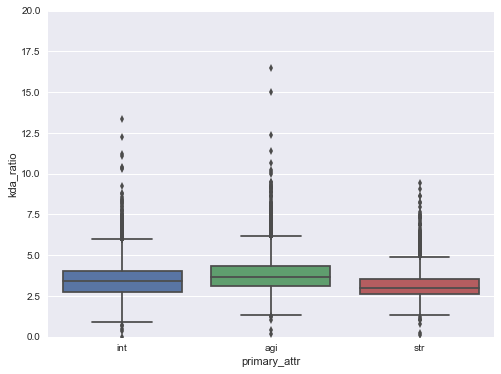

In [10]:
#box plot 
var = 'primary_attr'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=-0, ymax=20);

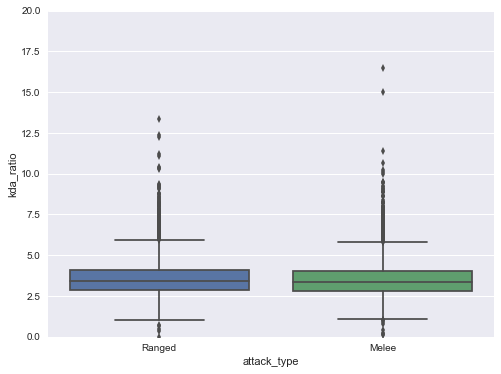

In [11]:
#box plot 
var = 'attack_type'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=0, ymax=20);

In [12]:
def split_roles(text):
    try: 
        x = text.split(":")
        if len(x) == 6:
            return x
        else:
            for i in range(6-len(x)):
                x.append("No Label")
            return x
    except: 
        return ("No Label", "No Label", "No Label", "No Label", "No Label", "No Label")

In [13]:
train['role_1'], train['role_2'], train['role_3'], train['role_4'], train['role_5'], train['role_6'] = \
zip(*train['roles'].apply(lambda x: split_roles(x)))

test['role_1'], test['role_2'], test['role_3'], test['role_4'], test['role_5'], test['role_6'] = \
zip(*test['roles'].apply(lambda x: split_roles(x)))

train.head()
train['role_1'].value_counts()

Carry        19417
Support       4440
Initiator     2211
Disabler      1438
Nuker         1077
Escape         388
Durable         51
Name: role_1, dtype: int64

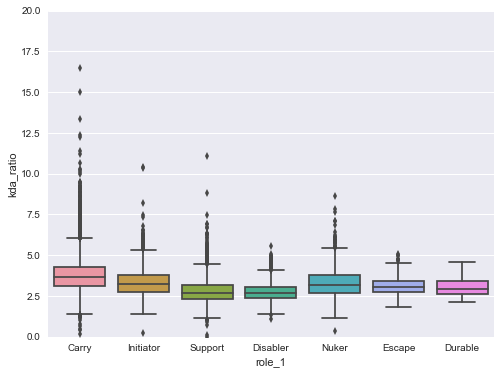

In [14]:
#box plot 
var = 'role_1'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=0, ymax=20);

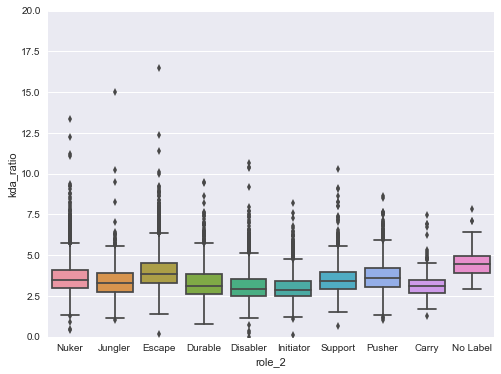

In [15]:
#box plot 
var = 'role_2'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=0, ymax=20);

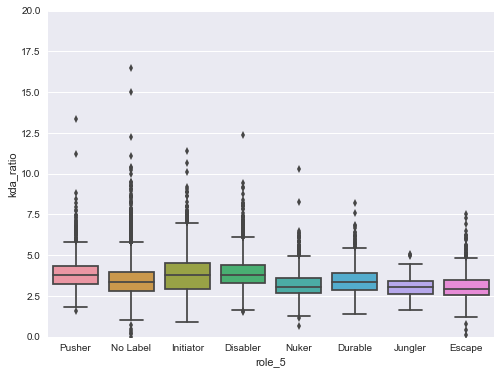

In [16]:
var = 'role_5'
data = pd.concat([train['kda_ratio'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="kda_ratio", data=data)
fig.axis(ymin=0, ymax=20);

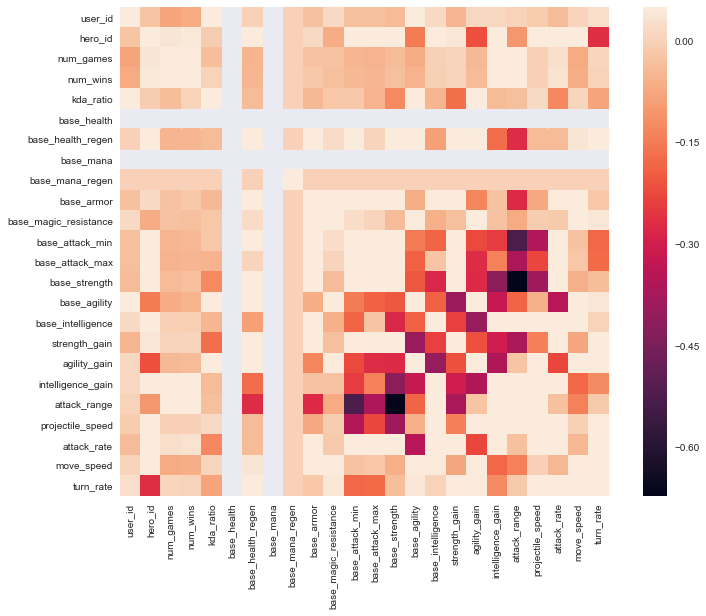

In [17]:
#correlation matrix
corr = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=0.05, square=True);

In [18]:
# Splitting the dataset into the Training set and Test set
feature_names = [x for x in train.columns if x not in ['hero_id', 'id', 'kda_ratio', 'user_id',
                                                       'num_wins','base_health','base_mana',
                                                       'roles','primary_attr','role_1','role_2',
                                                      'role_5','attack_type']]
target = train['kda_ratio']
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[feature_names], target, test_size = 0.1, random_state = 0)

/Users/kai/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
from sklearn.metrics import mean_squared_error
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

# CatBoost Regression
    1.     Description
    Training and applying models for the regression problems. When using the applying methods only the predicted class is returned. 
    CatBoostRegressor, or CatBoost in general, is designed for solving the painstaking data preprocessing stage for the categorical data. The nature of our dataset, which contains many categorical variables, suggests the usage of this machine learning algorithm. 
    2.     Justification for using CatBoost
    Performance: CatBoost provides state of the art results and it is competitive with any leading machine learning algorithm on the performance front.
    Handling Categorical features automatically: We can use CatBoost without any explicit pre-processing to convert categories into numbers. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features. You can read more about it here.
    Robust: It reduces the need for extensive hyper-parameter tuning and lower the chances of overfitting also which leads to more generalized models. Although, CatBoost has multiple parameters to tune and it contains parameters like the number of trees, learning rate, regularization, tree depth, fold size, bagging temperature and others. You can read about all these parameters here.
    Easy-to-use: You can use CatBoost from the command line, using an user-friendly API for both Python and R.

In [20]:
!pip3 install catboost

You are using pip version 19.0.3, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [34]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=500, depth=3, learning_rate=0.01, loss_function='RMSE', verbose= True)
model.fit(train[feature_names], target, cat_features = [18,19,20])
pred_cat = model.predict(test[feature_names])
pred_cat[:10]

KeyError: "['agi_gain' 'base_agi' 'base_int' 'base_mr' 'base_str' 'int_gain' 'legs'\n 'pro_ban' 'pro_pick' 'pro_win' 'str_gain' 'min_agi_gain'\n 'min_attack_range' 'min_attack_rate' 'min_base_agi' 'min_base_armor'\n 'min_base_attack_max' 'min_base_attack_min' 'min_base_health_regen'\n 'min_base_int' 'min_base_str' 'min_int_gain' 'min_legs' 'min_move_speed'\n 'min_pro_ban' 'min_pro_pick' 'min_pro_win' 'min_projectile_speed'\n 'min_str_gain' 'min_turn_rate' 'max_agi_gain' 'max_attack_range'\n 'max_attack_rate' 'max_base_agi' 'max_base_armor' 'max_base_attack_max'\n 'max_base_attack_min' 'max_base_health_regen' 'max_base_int'\n 'max_base_str' 'max_int_gain' 'max_legs' 'max_move_speed' 'max_pro_ban'\n 'max_pro_pick' 'max_pro_win' 'max_projectile_speed' 'max_str_gain'\n 'max_turn_rate' 'no_agi' 'no_int' 'no_str' 'no_melees' 'no_Carry'\n 'no_Disabler' 'no_Durable' 'no_Escape' 'no_Initiator' 'no_Jungler'\n 'no_Nuker' 'no_Pusher' 'no_Support'] not in index"

In [22]:
sub = pd.DataFrame()
sub['id'] = test1['id']
sub['kda_ratio'] = pred_cat #temp['kda_ratio'].values
sub.to_csv('result.csv', index=False)

In [23]:
sub

,id,kda_ratio
0,3_53,3.108561
1,4_17,3.771693
2,9_51,3.164698
3,10_54,3.589505
4,15_74,3.648739
5,19_38,3.276367
6,21_93,3.809899
7,31_80,3.733880
8,34_62,3.508241
9,35_74,3.647112


# KNN

In [26]:
radiant_cols = ['hero_' + str(i) for i in range(5)]
dire_cols = ['hero_' + str(i) for i in range(5, 10)]
no_heroes = 116

filter_cols = ['base_mr']

cont_variables = [
    'agi_gain',
    'attack_range',
    'attack_rate',
    'base_agi',
    'base_armor',
    'base_attack_max',
    'base_attack_min',
    'base_health_regen',
    'base_int',
    'base_mr',
    'base_str',
    'int_gain',
    'legs',
    'move_speed',
    'pro_ban',
    'pro_pick',
    'pro_win',
    'projectile_speed',
    'str_gain',
    'turn_rate',
]

unique_roles = [
    'Carry',
    'Disabler',
    'Durable',
    'Escape',
    'Initiator',
    'Jungler',
    'Nuker',
    'Pusher',
    'Support'
]

unique_primary_attrs = [
    'agi',
    'int',
    'str'
]
feature_names = cont_variables + \
    ['min_' + col for col in cont_variables if col not in filter_cols] + \
    ['max_' + col for col in cont_variables if col not in filter_cols] +  [
    'no_agi',
    'no_int',
    'no_str',
    'no_melees',
    'no_Carry',
    'no_Disabler',
    'no_Durable',
    'no_Escape',
    'no_Initiator',
    'no_Jungler',
    'no_Nuker',
    'no_Pusher',
    'no_Support',
]

def load_data():
    
    df = pd.read_csv('../data/matches_data.csv')
    radiants = pd.read_csv('../data/radiant_features.csv')
    dires = pd.read_csv('../data/dire_features.csv')
    
    assert np.all(radiants.columns == dires.columns), 'Radiants have different features than dires'
    assert df.shape[0] == radiants.shape[0], 'Number of matches in radiants are different to original matches data'
    assert df.shape[0] == dires.shape[0], 'Number of matches in dires are different to original matches data'
    assert len(feature_names) + 1 == radiants.shape[1]
    assert len(feature_names) + 1 == dires.shape[1]
    assert (radiants['match_id'] == dires['match_id']).all()
    assert (radiants['match_id'] == df['match_id']).all()
    
    radiants = radiants.\
        rename({col: 'radiant_' + col for col in feature_names}, axis=1).\
        drop('match_id', axis=1)
    dires = dires.\
        rename({col: 'dire_' + col for col in feature_names}, axis=1).\
        drop('match_id', axis=1)
    df = pd.concat([df[['match_id', 'radiant_win']], radiants, dires], axis=1)
    return radiants, dires, df

In [27]:
radiants, dires, df = load_data()


In [33]:
n_splits = 5
kf = KFold(n_splits, shuffle=True, random_state=10)
avg_score = {}
scores = []
avg_threshold = 0
k_values = range(5, 150, 2)
for k in k_values:
    print(k, ' ', end='')
    model = KNeighborsClassifier(k, n_jobs=-1)
    score = 0
    for i, (train_idx, test_idx) in enumerate(kf.split(df)):

        X_train = np.concatenate([radiants.iloc[train_idx].copy(), dires.iloc[train_idx].copy()], axis=1)
        X_test = np.concatenate([radiants.iloc[test_idx].copy(), dires.iloc[test_idx].copy()], axis=1)

        y_train = df.radiant_win.iloc[train_idx].values
        y_test = df.radiant_win.iloc[test_idx].values
        
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        
        score += accuracy_score(y_test, model.predict(X_test))
        
    score /= n_splits
    
    scores.append(score)
    
print('\nDone.')

5  7  9  11  13  15  17  19  21  23  25  27  29  31  33  35  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89  91  93  95  97  99  101  103  105  107  109  111  113  115  117  119  121  123  125  127  129  131  133  135  137  139  141  143  145  147  149  
Done.


Text(0.5,1,'Accuracy score of KNN with different K sizes')

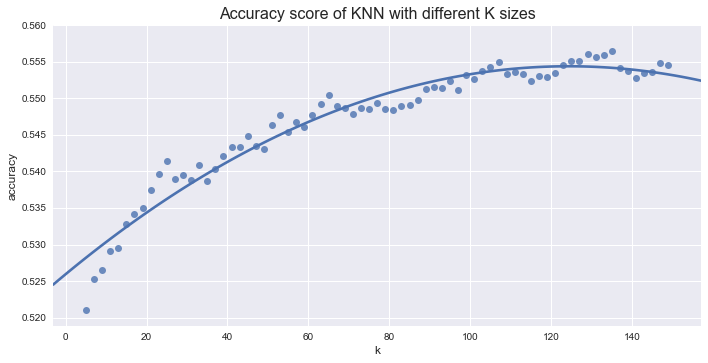

In [36]:
df = pd.DataFrame(list(zip(k_values, scores)), columns=['k', 'score'])
sns.lmplot(x='k', y='score', data=df,aspect=2, ci=None, order=2)
plt.ylabel('accuracy', fontsize=12)
plt.xlabel('k', fontsize=12)
plt.title('Accuracy score of KNN with different K sizes', fontsize=16)

# Neural Network

In [24]:
radiant_cols = ['hero_' + str(i) for i in range(5)]
dire_cols = ['hero_' + str(i) for i in range(5, 10)]
no_heroes = 116

radiants, dires, df = load_data()

In [25]:
#Inspired by https://github.com/hardianlawi 

n_splits = 5
kf = KFold(n_splits, shuffle=True, random_state=10)

avg_score = {}
scores = {}
avg_threshold = 0
histories = {}

for i, (train_idx, test_idx) in enumerate(kf.split(df)):
    X_train = [radiants.iloc[train_idx].copy(), dires.iloc[train_idx].copy()]
    X_test = [radiants.iloc[test_idx].copy(), dires.iloc[test_idx].copy()]
    y_train = df.radiant_win.iloc[train_idx].values
    y_test = df.radiant_win.iloc[test_idx].values
    models_dict = {
        'custom_nn_relu': [
            define_model(activation='relu', name='custom_nn', optimizer='adam', seed=0),
        ],
        'custom_nn_tanh': [
            define_model(activation='tanh', name='custom_nn', optimizer='adam', seed=0),
        ],
        'custom_nn_l2_regularizer': [
            define_model(activation='relu', name='custom_nn_l2_regularizer', optimizer='adam', seed=0),
        ],
        'custom_nn_dropout': [
            define_model(activation='relu', name='custom_nn_dropout', optimizer='adam', seed=0),
        ],
        'nn_tanh': [
            define_model(activation='tanh', name='nn_tanh', optimizer='adam', seed=0),
        ],
        'nn_relu': [
            define_model(activation='relu', name='nn_relu', optimizer='adam', seed=0),
        ],
        'nn_l2_regularizer': [
            define_model(activation='relu', name='nn_l2_regularizer', optimizer='adam', seed=0),
        ],
        'nn_dropout': [
            define_model(activation='relu', name='nn_dropout', optimizer='adam', seed=0),
        ],
    }
    
    if i not in histories:
        histories[i] = {}
    scores[i] = {}
    for key, models in models_dict.items():
        if key not in avg_score:
            avg_score[key] = dict(train=0, test=0)
        if key not in histories[i]:
            histories[i][key] = {}
        temp_preds = train_and_pred(models, X_train, y_train, X_test, y_test, key)
        temp_scores = accuracy_score(y_train, temp_preds[0] > 0.5), \
            accuracy_score(y_test, temp_preds[1] > 0.5)
        
        avg_score[key]['train'] += temp_scores[0]
        avg_score[key]['test'] += temp_scores[1]
        
        scores[i][key] = temp_scores[1]

        print(key, '==', 
              'train: %.4f' % temp_scores[0], '-',
              'test: %.4f' % temp_scores[1])
        
        histories[i][key].update(temp_preds[2].history)

    print('=================================================\n')
          
############################################################################

print('Average score\n--------------------')
for key, models in models_dict.items():
    print(key, '=======', 
          'train:', avg_score[key]['train'] / n_splits, '----',
          'test:', avg_score[key]['test'] / n_splits)

custom_nn_relu == train: 0.5986 - test: 0.5624
custom_nn_tanh == train: 0.6025 - test: 0.5636
custom_nn_l2_regularizer == train: 0.5710 - test: 0.5704
custom_nn_dropout == train: 0.6006 - test: 0.5795
nn_tanh == train: 0.6555 - test: 0.5509
nn_relu == train: 0.6490 - test: 0.5546
nn_l2_regularizer == train: 0.5736 - test: 0.5726
nn_dropout == train: 0.5927 - test: 0.5686

custom_nn_relu == train: 0.5990 - test: 0.5711
custom_nn_tanh == train: 0.5995 - test: 0.5636
custom_nn_l2_regularizer == train: 0.5711 - test: 0.5651
custom_nn_dropout == train: 0.5962 - test: 0.5718
nn_tanh == train: 0.6579 - test: 0.5405
nn_relu == train: 0.6420 - test: 0.5541
nn_l2_regularizer == train: 0.5706 - test: 0.5569
nn_dropout == train: 0.5937 - test: 0.5675

custom_nn_relu == train: 0.5994 - test: 0.5596
custom_nn_tanh == train: 0.5962 - test: 0.5654
custom_nn_l2_regularizer == train: 0.5721 - test: 0.5703
custom_nn_dropout == train: 0.6012 - test: 0.5728
nn_tanh == train: 0.6581 - test: 0.5467
nn_relu =

Based on our calculation, we can achieve a 57% accuracy by using the dropout. 

## BenchMark
    Our algorithm yields the prediction accuracy of 57.2%, which is better than the probability of random guesses.
## Future Work
    The prediction accuracy of 57.2% might seem as insignificant improvement in the first glance, but the fact that we only make our prediction based on the raw statistics of the heroes makes the 7.2% improvement significant. Besides the natural statistical counter and synergies between heroes, a huge part of winning the Dota 2 lies on the skills of the heroes, which is exponentially hard to take into the counter/synergy among heroes’ skills into account statistically. Once we find the way to analyze the skills of each hero with a united statistical standards, the result would improve dramatically.
    Moreover, although the version of the game did not change during the time, we collected match data, a new patch is released for Dota 2 every few months that dramatically changes the balance of the game. Therefore, we believe that a auto-reset mechanism should be set, which reconfigure every time when a new patch is released, to maintain the relevancy of the algorithm.

## Reference
    1. S. Amartya, K.D. Kundan, Application of Data mining Techniques in Bioinformatics, B.Tech Computer Science Engineering thesis, National Institute of Technology, (Deemed University), Rourkela, 2007.
    2. H. Jiawei, K. MichelineData mining concept and Techniques
    (second ed.), Morgan Kaufmann Publishers, Elsevier inc., USA San Francisco, CA 94111 (2006)
    p. 285–350
    3. M.F. Federico, L.L. PierMining interesting knowledge from weblog: a survey. J. Data Knowledge Eng., 53 (2005) (2005), pp. 225-241, 10.1016/j.datak.2004.08.001
    4. C. Luca, G. PaoloImproving classification models with taxonomy information. J. Data Knowledge Eng., 86 (2013) (2013), pp. 85-101, 10.1016/j. datak.2013.01.005
    5. T. Luigi, S. GiacomoMining frequent item sets in data streams within a time horizon
     J. Data Knowledge Eng., 89 (2014), pp. 21-37, 10.1016/j.datak.2013.10.002
    6. L. Shu-Hsien, C. Pei-Hui, H. Pei-YuanData mining techniques and applications- A decade review from 2000 to 2011
    Journal of expert system with applications, 39 (2012) (2012), pp. 11303-11311, 10.1016/j.eswa.2012.02.063
    7. Z. Xuejuu, E. John, H. JennyPersonalised online sales using web usage data mining
    J. Comput. Ind., 58 (2007) (2007), pp. 772-782, 10.1016/j.compind.2007.02.004
    8. D. Resul, T. IbrahimCreating meaningful data from web log for improving the impressiveness of a web site by using path analysis method
    Journal of expert system with applications, 36 (2008) (2008), pp. 6635-6644, 10.1016/j.eswa.2008.08.067
    9. T. Rivas, M. Paz, J.E. Martins, J.M. Matias, J.F. Gracia, J. TaboadasExplaining and predicting workplace accidents using data-mining Techniques
    Journal of Reliable Engineering and System safety, 96 (7) (2011), pp. 739-747, 10.1016/j.ress.2011.03.006
    10. M.K. James, R.G. Michael, A.G. James, A fuzzy K-Nearest Neighbor Algorithm. IEEE Transactions on System Man and Cybernetics, vol. SMC-15 No4.[0018-9472/85/0700-058001.00], 1985.
    11. L. Habin, K. VladoCombining mining of web server logs and web content for classifying users’ navigation pattern and predicting users future request J. Data Knowledge Eng., 61 (2007) (2006), pp. 304-330, 10.1016/j.datak.2006.06.001
    12. H. Paul, N. Kenta, Better Prediction of Protein Cellular Localization Sites with the K-Nearest Neighbor Classifier, ISMB-97, Proceeding of America Association for Artificial Intelligence, USA, 1997, pp. 147–152.
